## Question 1, 2 and 3
#### 1) b1 = 1.87: For one unit of increase in X, on average, Y increase by 1.87.
#### 2) R**2 = 89%: 89% of the variability in Y can be explained by linear model in which X is the predictor variable.
#### 3) X = 3.2: ^Y = 3.2 + 1.87(3.2) = 9.18

## Question 4

In [1]:
## (a)
# Importing pandas library
import pandas as pd

# Reading csv file
batting = pd.read_csv('Batting.csv')
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [3]:
## (b)
# Aggregating data at the player
batting_agg = batting.groupby('playerID')[['HR', 'AB', 'SO']].sum()
batting_agg.head()

,HR,AB,SO
playerID,,,
aardsda01,0,4,2.0
aaronha01,755,12364,1383.0
aaronto01,13,944,145.0
aasedo01,0,5,3.0
abadan01,0,21,5.0


In [4]:
## (c)
# Selecting players with at least 5000 at bats
batting_agg = batting_agg[batting_agg['AB'] >= 5000]
batting_agg.head()

,HR,AB,SO
playerID,,,
aaronha01,755,12364,1383.0
abreubo01,288,8480,1840.0
adamssp01,9,5557,223.0
adcocjo01,336,6606,1059.0
alfoned01,146,5385,617.0


In [5]:
## (d)
# Computing home-runs and strikeout
batting_agg['HR_rate'] = batting_agg['HR'] / batting_agg['AB']
batting_agg['SO_rate'] = batting_agg['SO'] / batting_agg['AB']
batting_agg.head()

,HR,AB,SO,HR_rate,SO_rate
playerID,,,,,
aaronha01,755,12364,1383.0,0.061064,0.111857
abreubo01,288,8480,1840.0,0.033962,0.216981
adamssp01,9,5557,223.0,0.001620,0.040130
adcocjo01,336,6606,1059.0,0.050863,0.160309
alfoned01,146,5385,617.0,0.027112,0.114578


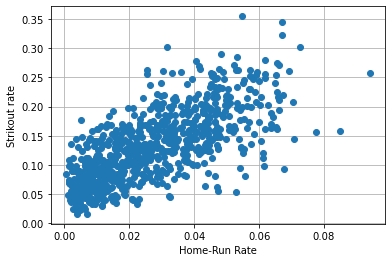

In [6]:
## (e)
import matplotlib.pyplot as plt

# Creating a scatter-plot between home-run and strikout rate
plt.plot('HR_rate', 'SO_rate', 'o', data = batting_agg)
plt.xlabel('Home-Run Rate')
plt.ylabel('Strikout rate')
plt.grid()
plt.show()

#### From the above the scatter-plot, we can see a strong positive relationship between HR_rate and SO_rate.

In [7]:
## (f)
import statsmodels.formula.api as smf

# Building linear regression model
lm_md = smf.ols(formula = 'SO_rate ~ HR_rate', data = batting_agg).fit()
lm_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                SO_rate   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     872.6
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          1.91e-130
Time:                        11:51:14   Log-Likelihood:                 1395.3
No. Observations:                 806   AIC:                            -2787.
Df Residuals:                     804   BIC:                            -2777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0620      0.003     23.261      0.000       0.057       0.067
HR_rate        2.4907      0.084     29.540      0.000       2.325       2.656
==============================================================================
Omnibus:                       15.653   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.475
Skew:                           0.236   Prob(JB):                     5.90e-05
Kurtosis:                       3.598   Cond. No.                         55.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
## Defining new data-points
newdata = pd.DataFrame({'HR_rate': [0.05]})

## Predicting HR_rate on the new data_point
lm_md.predict(newdata)

0    0.186524
dtype: float64